# Predicting heart Disease using machine learning 

this notebook looks into using python machine learning and data science libraries in an attempt to build a machine learning model based on their medical attributes

the following steps are followed here :
1. Problem Definition
2. Data
3. evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a Statement, 
> Given Clinical parameters about a patient , can we predict whether or not they have heart disease?.


## 2. Data

the original data came from the cleaveland data from UCI machine learning Repository.

https://archive.ics.uci.edu/dataset/45/heart+disease

there is also a version of it available on kaggle. 

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download


## 3. Evaluation.

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of the concept , we'll pursue the project.

## 4.features

This is where u'll get different information about each of the features in your data.


**create data  dictionary**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for                    concern
* chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will               stress more
* slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
* thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools for the project

* we need to import pandas, numpy, and mathplotlib  for data analysis and manipulation


In [84]:
#import the important libraries

# Regular EDA(Exploratory data analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# To see our plots in the notebook itself

%matplotlib inline 

#models from skitlearn

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluation 

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score



## LOAD THE DATA

In [4]:
# now lets us get our data here

df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Analysis (Exploratory  Data Analysis or EDA)

here we should know enough about the data we are working on to become a subject matter expert

1. what questions am i trying to solve
2. What data types do i have and how to treat different data types
3. What is missing from the data and how do you deal with it.
4. where are the outliners and why should i care about them.
5. How can i add , remove or change features to get more out of the data.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
"""the target column is our goal , we need to train a machine learning model to be able 
to accurately predict wheather a person has heart disease or not""";

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

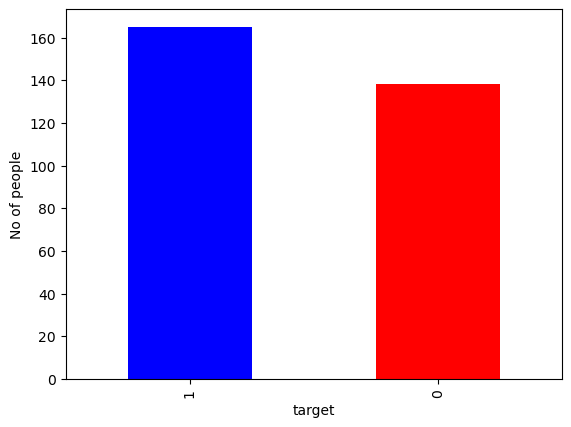

In [7]:
df['target'].value_counts().plot(kind = "bar", color = ['Blue', "red"], label = "target");
plt.ylabel("No of people");
plt.xlabel("target");

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## now let  us compare different columns to find out a pattern 



In [11]:
# lets start with the sex column of the people

df.sex.value_counts()

# 1 = male, 0 = female

1    207
0     96
Name: sex, dtype: int64

In [12]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


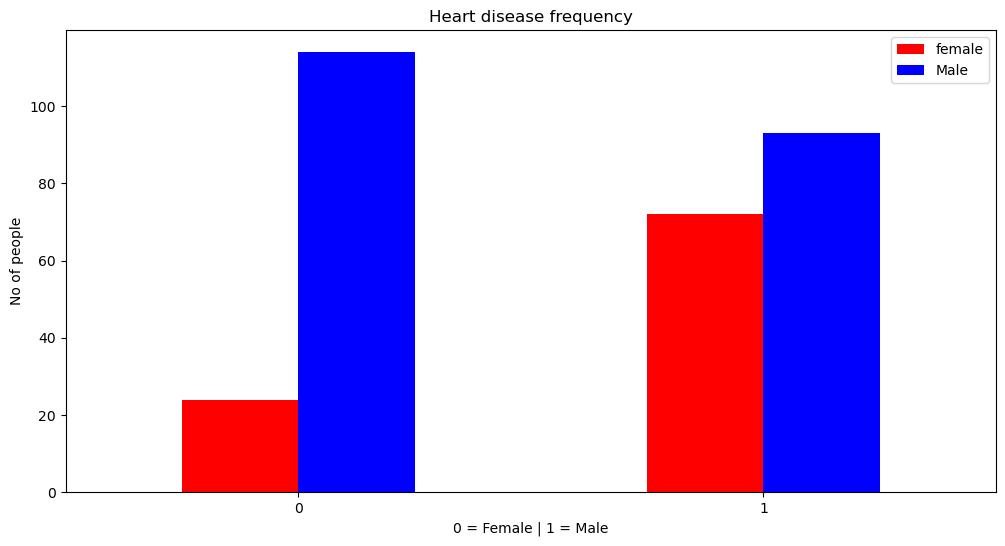

In [13]:
pd.crosstab(df.target,df.sex).plot(kind = "bar", figsize = (12,6), color = ["red", "blue"] );
plt.title("Heart disease frequency")
plt.xlabel( "0 = Female | 1 = Male")
plt.ylabel("No of people")
plt.legend(["female", "Male"])
plt.xticks(rotation = 0);

## Now let us compare age vs thalach ( Maximum heart rate of the person)

In [14]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

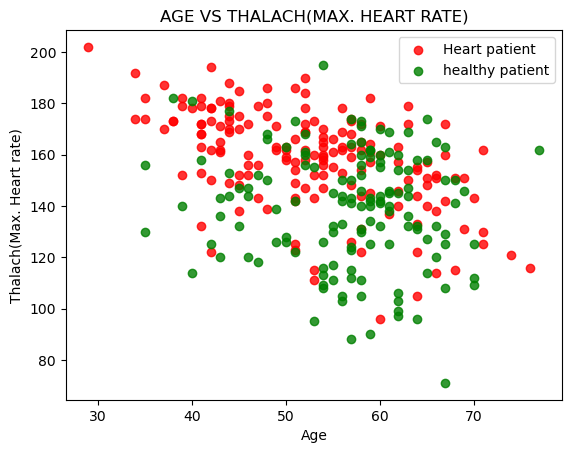

In [15]:
# the above information is not quite easily understandable

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = ["red"], alpha = 0.8)
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = ["green"], alpha = 0.8);
plt.ylabel("Thalach(Max. Heart rate)")
plt.xlabel("Age")
plt.legend(["Heart patient", "healthy patient"])
plt.title("AGE VS THALACH(MAX. HEART RATE)");

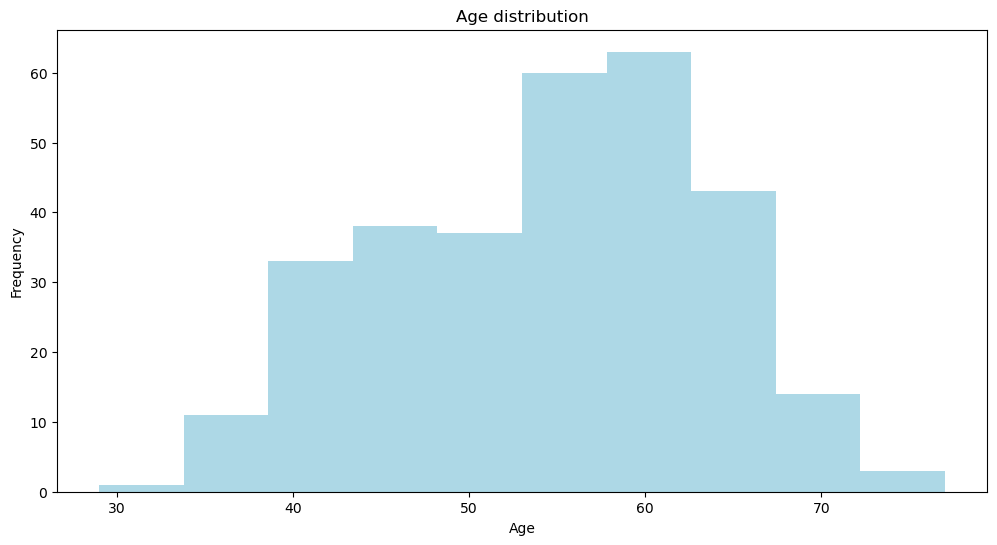

In [16]:
# from the above graph we can see as the age is inversely proportional to Maximum heart rate .

# age distribution graph

df.age.plot(kind = "hist", figsize = (12,6), color = "lightblue");
plt.xlabel("Age");
plt.title("Age distribution");

## Heart Disease frequency per chest pain type

1. cp - chest pain type

        * Typical angina: chest pain related decrease blood supply to the heart
        * Atypical angina: chest pain not related to heart
        * Non-anginal pain: typically esophageal spasms (non heart related)
        * Asymptomatic: chest pain not showing signs of disease

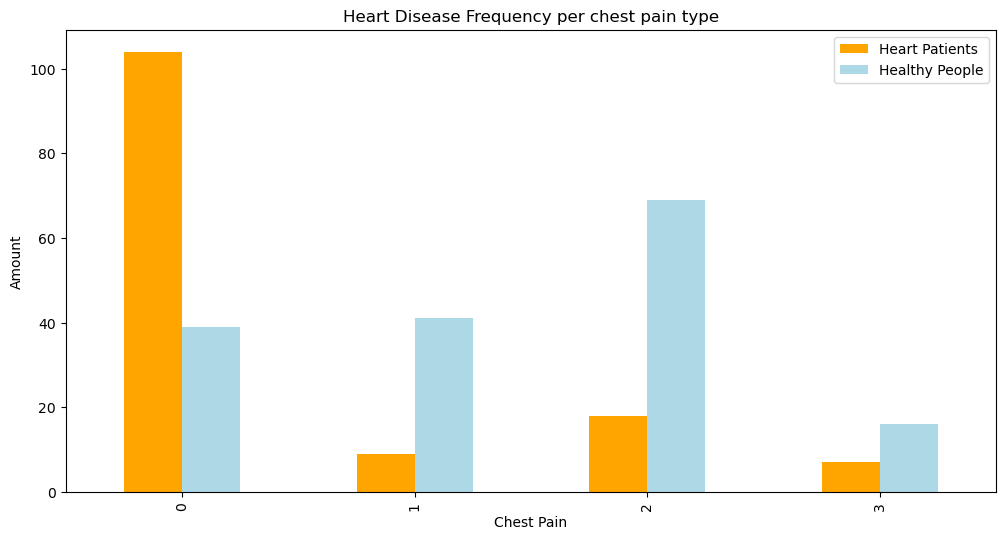

In [17]:
pd.crosstab(df.cp, df.target).plot( kind = "bar", figsize = (12,6), color = ["orange", "lightblue"])
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.title("Heart Disease Frequency per chest pain type")
plt.legend(["Heart Patients", "Healthy People"]);

In [18]:
# make a  correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


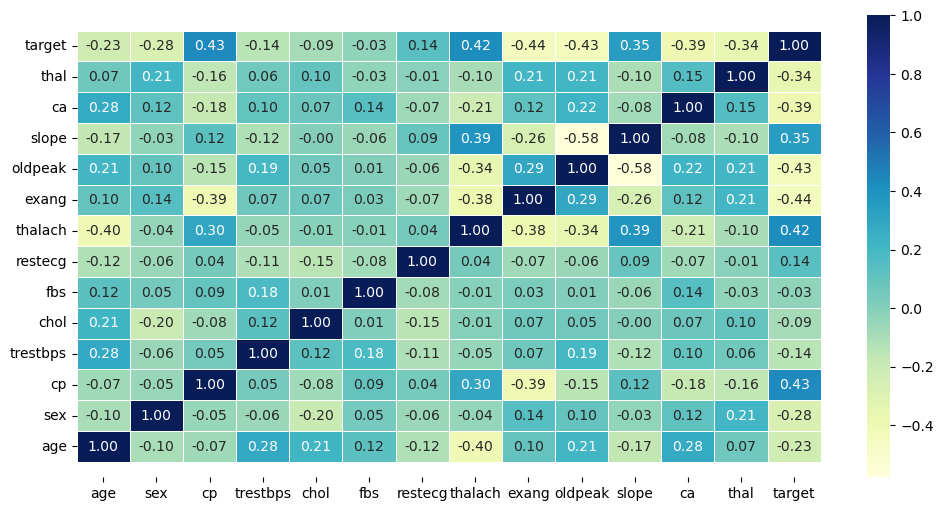

In [19]:
# plot the above information 

corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (12,6))
ax = sns.heatmap(corr_matrix, annot = True, linewidth = 0.5,fmt = "0.2f",cmap = "YlGnBu")
bottom , top = ax.get_ylim()
ax.set_ylim(top -0.5, bottom + 0.5);

## MODELLING

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split the data into independent/features and dependent variables i.e x and y

x = df.drop("target", axis = 1)

y = df["target"]

In [22]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
np.random.seed(100)

# now split this data into training and testing data 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1


In [26]:
y_train

184    0
19     1
118    1
41     1
59     1
      ..
66     1
53     1
79     1
280    0
8      1
Name: target, Length: 242, dtype: int64

* x_train , y_train is used for training the given model and should not be used for testing

* x_test , y_test is used for testing purpose 

![The Map for choosing the right eatimator](https://scikit-learn.org/stable/_static/ml_map.png)

* the above map show the process for different types of machine learning model 

* so from the map we are going to use:
    1. linear SVC
    2. Logistic regression
    3. K Neighbours Classifiers
    4. Random Forest Classifier

In [27]:
# put Models in a dictionary

models  = { "linearSVC" : svm.SVC(),
            "Decision tree classifier" : DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0),
            "Logistic Regression" : LogisticRegression(),
            "KNN" : KNeighborsClassifier(),
            "Random forest classifier" : RandomForestClassifier()}

In [28]:
# create a function to fit and check the score of each model

def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    this function fits the model and trains it on x_train and y_train 
    and then evaluates the score of each machine larning model
    """
    scores = {}
    
    for name, model in models.items():
        # train the mmodel
        model.fit(x_train, y_train)
        #calculate and store the score of each model
        scores[name] = model.score(x_test, y_test)
        
        
    return scores
        
        

In [29]:
modelscores = fit_and_score(models, x_train, x_test, y_train, y_test)

modelscores

C:\Users\RANJITH SHETTY N\Desktop\Sample_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'linearSVC': 0.6885245901639344,
 'Decision tree classifier': 0.8852459016393442,
 'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6557377049180327,
 'Random forest classifier': 0.8852459016393442}

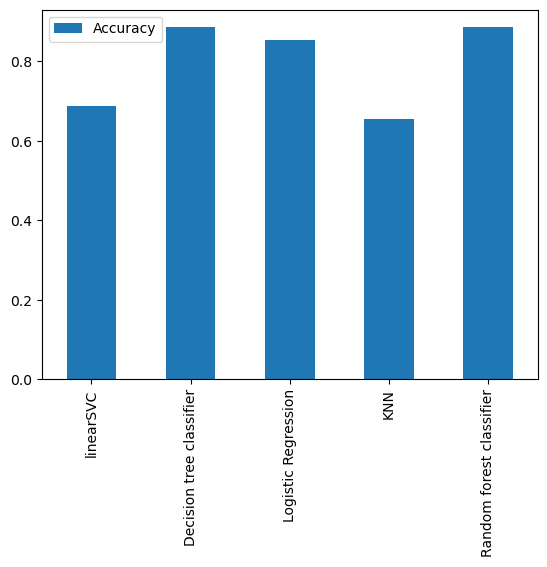

In [30]:
model_compare = pd.DataFrame(modelscores, index = ["Accuracy"])
model_compare.T.plot.bar();

## Improving our models (hyperparameter tuning)



In [32]:
#1. KNN

train_scores = []
test_scores = []

#create a list of different values for n neighbors 

neighbours = range(1,21,1)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))
    
    

In [33]:
train_scores

[1.0,
 0.7851239669421488,
 0.7892561983471075,
 0.743801652892562,
 0.756198347107438,
 0.7355371900826446,
 0.7024793388429752,
 0.7148760330578512,
 0.6735537190082644,
 0.6735537190082644,
 0.6818181818181818,
 0.6694214876033058,
 0.6818181818181818,
 0.6859504132231405,
 0.6611570247933884,
 0.6487603305785123,
 0.6652892561983471,
 0.6694214876033058,
 0.6776859504132231,
 0.6900826446280992]

In [34]:
test_scores

[0.639344262295082,
 0.5901639344262295,
 0.6721311475409836,
 0.6557377049180327,
 0.6557377049180327,
 0.7704918032786885,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6721311475409836,
 0.6885245901639344]

Maximum KneighborsClassifier() Score on testing is 77.05%


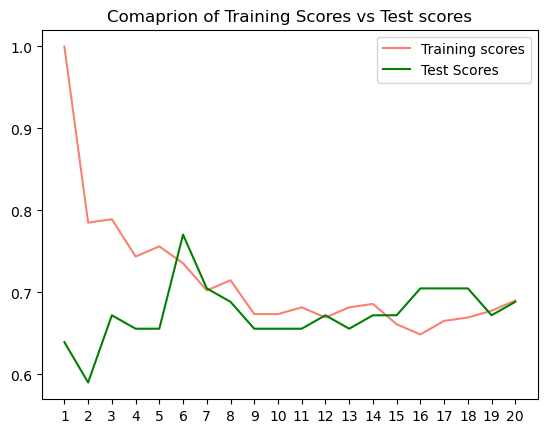

In [38]:
# vizulisation 

plt.plot(neighbours, train_scores, label = "Training scores", color = "salmon")
plt.plot(neighbours, test_scores, label = "Test Scores", color = "green")
plt.xticks(np.arange(1,21,1))
plt.title("Comaprion of Training Scores vs Test scores")
plt.legend()
print(f"Maximum KneighborsClassifier() Score on testing is {max(test_scores)*100:.2f}%")

max_knn = max(test_scores)

## tuning models using Randomisedsearch

In [50]:
# create a hyper parameter grid for logistic regression

logis_regr_grid = {"C" : np.logspace(-4,4,20)
             ,"solver" : ["liblinear"]}
# create a hyper parameter grid for Randomforestclassifier 
rndm_frst_grid = {"n_estimators" : np.arange(10,1000,50),
             "max_depth" : np.arange(3,15,3),
             "min_samples_split" : np.arange(2, 20, 2),
             "min_samples_leaf" : np.arange(1,20,2)}

In [51]:
np.random.seed(100)

log_reg = RandomizedSearchCV(LogisticRegression(),
                             param_distributions = logis_regr_grid,
                             cv = 5,
                             n_iter = 20,
                             verbose = True)

# now fit the model and check the scores

log_reg.fit(x_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [52]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [53]:
log_reg.score(x_test, y_test)

0.8524590163934426

In [56]:
# logistic regression score has not changed

np.random.seed(100)

# lets try RandomForestClassifier

rndm_frst = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions = rndm_frst_grid,
                               cv = 5,
                               n_iter = 40,
                               verbose = True)

rndm_frst.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'max_depth': array([ 3,  6,  9, 12]),
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [57]:
rndm_frst.score(x_test, y_test)

0.8688524590163934

In [58]:
rndm_frst.best_params_

{'n_estimators': 410,
 'min_samples_split': 4,
 'min_samples_leaf': 13,
 'max_depth': 9}

## GRIDSEARCH

In [67]:
# create a hyper parameter grid for logistic regression


log_gs_grid = {"C" : np.logspace(-4,4,60)
             ,"solver" : ["liblinear"]}


# create a hyper parameter grid for Randomforestclassifier 


rndm_gs_grid = {"n_estimators" : np.arange(10,1000,50),
             "max_depth" : np.arange(3,15,3),
             "min_samples_split" : np.arange(2, 20, 2),
             "min_samples_leaf" : np.arange(1,20,2)}



In [69]:
# fit the models

log_gs = GridSearchCV(LogisticRegression(),
                      param_grid = log_gs_grid,
                      cv = 5,
                      verbose = True)


log_gs.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.36644835e-04, 1.86718109e-04, 2.55140652e-04,
       3.48636523e-04, 4.76393801e-04, 6.50967523e-04, 8.89513497e-04,
       1.21547425e-03, 1.66088278e-03, 2.26951054e-03, 3.10116893e-03,
       4.23758716e-03, 5.79044398e-03, 7.91234262e-03, 1.08118075e-02,
       1.47737765e-02, 2.01876025e-02, 2.758531...
       7.60949669e+00, 1.03979842e+01, 1.42083083e+01, 1.94149195e+01,
       2.65294846e+01, 3.62511705e+01, 4.95353521e+01, 6.76875001e+01,
       9.24914728e+01, 1.26384820e+02, 1.72698329e+02, 2.35983347e+02,
       3.22459055e+02, 4.40623643e+02, 6.02089449e+02, 8.22724134e+02,
       1.12421004e+03, 1.53617495e+03, 2.09910372e+03, 2.86831681e+03,
       3.91940677e+03, 5.35566692e+03, 7.31824222e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [71]:
log_gs.best_params_

{'C': 1.1689518164985777, 'solver': 'liblinear'}

In [72]:
log_gs.score(x_test, y_test)

0.8524590163934426

## Evaluating the above machine learning classifier  by

1. ROC curve and AUC
2. confusion matrix
3. classification report
4. precision
5. Recall
6. f1-score

we should use cross validation where ever possible

In [89]:
# calculate the roc curve and auc

y_preds = log_gs.predict(x_test)

y_proba1 = log_gs.predict_proba(x_test)


y_probs_positive = y_proba1[:,1]

In [80]:
fpr, tpr, threshholds = roc_curve(y_test, y_probs_positive)

In [87]:
# now let us write a function to implement roc curve graghically

def plot_roc_curve(fpr, tpr):
    """
    plots the roc curve give the false positive rate and the true positive rate of the given model
    
    """
    plt.plot(fpr,tpr,color = "orange", label = "ROC")
    plt.plot([0,1],[0,1], color = "blue", linestyle = "--", label = "guessing")
    plt.xlabel("False positive Rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating characteristic curve (ROC) ")
    plt.show()
    print(f"AUC SCORE = {roc_auc_score(y_test, y_probs_positive)*100:.2f}")

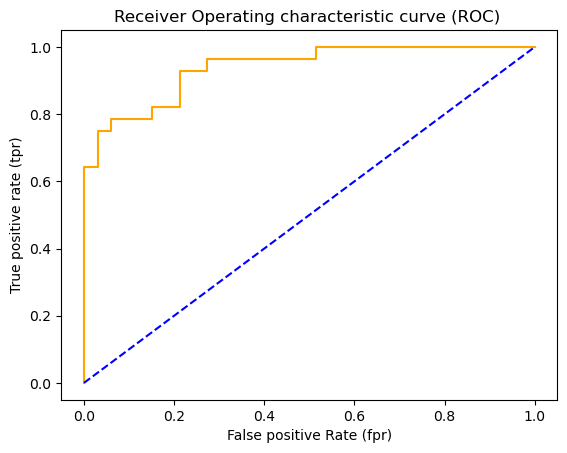

AUC SCORE = 93.83


In [88]:
plot_roc_curve(fpr, tpr)

In [90]:
# useing confusion matrix to evaluate the model

print(confusion_matrix(y_test, y_preds))

[[26  7]
 [ 2 26]]


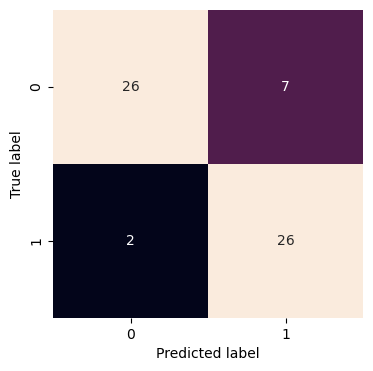

In [91]:
def confusionmatrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
confusionmatrix(y_test, y_preds)